# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
    
)

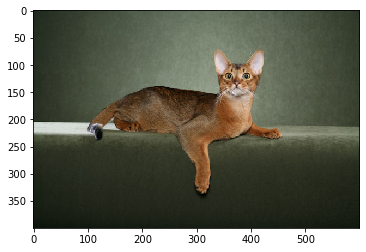

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


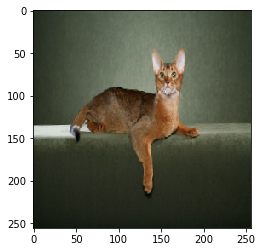

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50,  0, 50]
)

Found 1 images belonging to 1 classes.


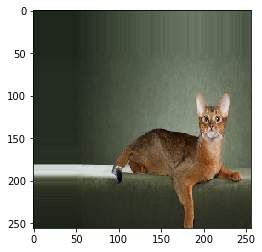

In [14]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


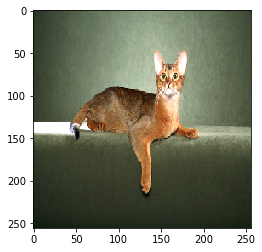

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


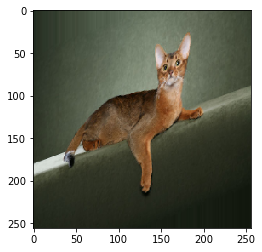

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


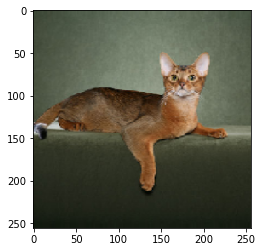

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


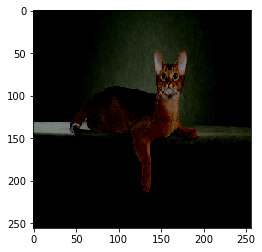

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [27]:
x.mean()

7.9870114

In [28]:
np.array(Image.open(image_path)).mean()

69.57810416666666

Found 1 images belonging to 1 classes.


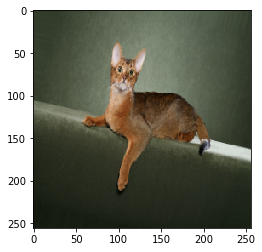

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip= True,
    vertical_flip= True,
    rotation_range=30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Normalization

### Featurewise

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
'''
x_mean = x_train.mean()
x_std = x_train.std()
x_train_norm = (x_train - x_mean)/x_std
'''
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [41]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.5380135 0.80750835 [[2]]
120.70756512369792


### Samplewise

In [42]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-7.450581e-09 1.0 [[8]]


# Rescale and Preprocessing Function

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [48]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [49]:
print(x.mean(), x.std(), y)

-0.3893918 0.4539094 [[3]]


# Model Training

In [50]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top =False, input_shape= (32,32,3),
    pooling ="avg"
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [56]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=10, steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
Epoch 1/10
10/10 [==============================] - 4s 427ms/step - loss: 1.9244 - accuracy: 0.3375
Epoch 2/10
10/10 [==============================] - 5s 454ms/step - loss: 2.0051 - accuracy: 0.3156
Epoch 3/10
10/10 [==============================] - 4s 425ms/step - loss: 1.8321 - accuracy: 0.3562
Epoch 4/10
10/10 [==============================] - 4s 416ms/step - loss: 1.8459 - accuracy: 0.3375
Epoch 5/10
10/10 [==============================] - 4s 416ms/step - loss: 1.7287 - accuracy: 0.3656
Epoch 6/10
10/10 [==============================] - 4s 418ms/step - loss: 1.7673 - accuracy: 0.4250
Epoch 7/10
10/10 [==============================] - 4s 415ms/step - loss: 1.7797 - accuracy: 0.3750
Epoch 8/10
10/10 [==============================] - 4s 414ms/step - loss: 1.8159 - accuracy: 0.3688
Epoch 9/10
10/10 [==============================] - 4s 416ms/step - loss: 1.7070 - accuracy: 0.4219
Epoch 10/10
10/10 [==============================] - 4s 